In [ ]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

df = pd.read_csv('emails.csv')

print("First few rows of the DataFrame:\n", df.head())
print("\nColumn names:\n", df.columns)

First few rows of the DataFrame:
   Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]

Column names:
 Index(['Emai

In [ ]:
# Exclude 'Email No.' column and 'Prediction' column from features
X = df.drop(columns=['Email No.', 'Prediction'])
y = df['Prediction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [ ]:
print("\nK-Nearest Neighbors (KNN) Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

print("\nSupport Vector Machine (SVM) Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


K-Nearest Neighbors (KNN) Performance:
Accuracy: 0.8628019323671497
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       739
           1       0.73      0.83      0.78       296

    accuracy                           0.86      1035
   macro avg       0.83      0.85      0.84      1035
weighted avg       0.87      0.86      0.87      1035


Support Vector Machine (SVM) Performance:
Accuracy: 0.9594202898550724
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       739
           1       0.92      0.94      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



In [29]:
# Combine the actual and predicted labels with email indices for better clarity
results_knn = pd.DataFrame({
    'Email No.': df.loc[X_test.index, 'Email No.'],
    'Actual': y_test,
    'Predicted (KNN)': y_pred_knn
})

results_svm = pd.DataFrame({
    'Email No.': df.loc[X_test.index, 'Email No.'],
    'Actual': y_test,
    'Predicted (SVM)': y_pred_svm
})

In [30]:
print("\nK-Nearest Neighbors (KNN) Predictions vs Actual:")
print(results_knn.head())
print("\nSupport Vector Machine (SVM) Predictions vs Actual:")
print(results_svm.head())


K-Nearest Neighbors (KNN) Predictions vs Actual:
       Email No.  Actual  Predicted (KNN)
1566  Email 1567       0                0
1988  Email 1989       0                0
1235  Email 1236       1                1
3276  Email 3277       0                0
3438  Email 3439       0                0

Support Vector Machine (SVM) Predictions vs Actual:
       Email No.  Actual  Predicted (SVM)
1566  Email 1567       0                0
1988  Email 1989       0                0
1235  Email 1236       1                1
3276  Email 3277       0                0
3438  Email 3439       0                0


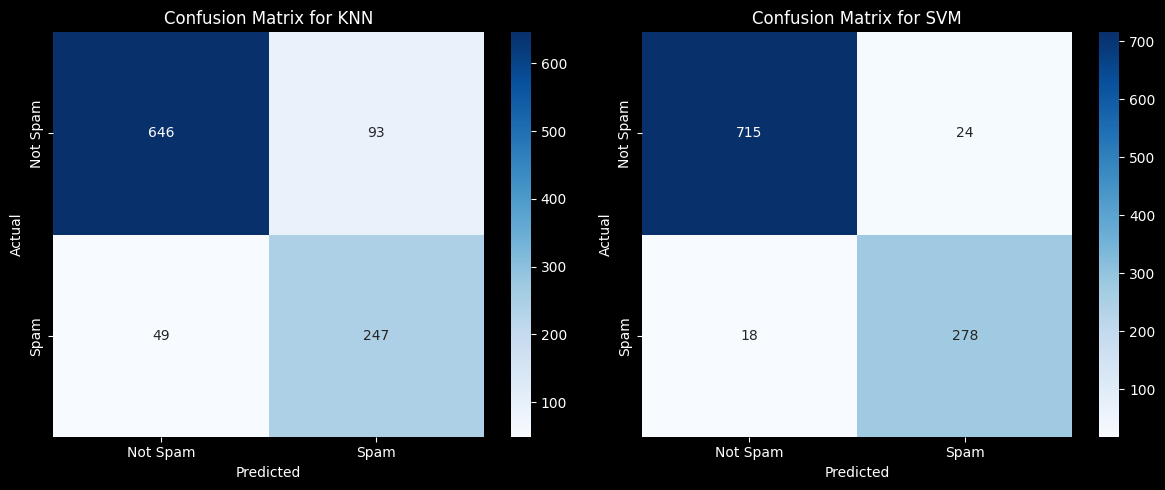

In [31]:
# Create confusion matrices
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plotting the confusion matrix for KNN
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plotting the confusion matrix for SVM
plt.subplot(1, 2, 2)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()
